#Topic 2.2: Bayesian Networks

#Exercise 1: Setting Up the Environment

1. Install the Required Library

In [1]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.4 MB/s eta 0:00:00


2. Import Libraries

In [2]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation
from pgmpy.factors.discrete import TabularCPD

#Exercise 2: Building a Simple Bayesian Network

1. Define the Structure

In [3]:
model = BayesianModel([('Weather', 'Traffic'), ('Traffic', 'Late')])

2. Define Conditional Probability Tables (CPTs)

In [4]:
cpd_weather = TabularCPD(variable='Weather', variable_card=2, values=[[0.8], [0.2]])

cpd_traffic = TabularCPD(variable='Traffic', variable_card=2, values=[[0.9, 0.5], [0.1, 0.5]], evidence=['Weather'], evidence_card=[2])

cpd_late = TabularCPD(variable='Late', variable_card=2, values=[[0.95, 0.4], [0.05, 0.6]], evidence=['Traffic'], evidence_card=[2])

model.add_cpds(cpd_weather, cpd_traffic, cpd_late)

assert model.check_model()

#Exercise 3: Querying the Bayesian Network

1. Perform Exact Inference

In [5]:
inference = VariableElimination(model)

result = inference.query(variables=['Late'], evidence={'Weather': 1})
print(result)

+---------+-------------+
| Late    |   phi(Late) |
+=========+=============+
| Late(0) |      0.6750 |
+---------+-------------+
| Late(1) |      0.3250 |
+---------+-------------+


#Exercise 4: Parameter Learning


1. Simulate a Dataset

In [6]:
data = pd.DataFrame({'Weather': np.random.choice([0, 1], size=1000, p=[0.8, 0.2]), 'Traffic': np.nan, 'Late': np.nan})

data.loc[data['Weather'] == 0, 'Traffic'] = np.random.choice([0, 1], size=data[data['Weather'] ==0].shape[0], p=[0.9, 0.1])

data.loc[data['Weather'] == 1, 'Traffic'] = np.random.choice([0, 1], size=data[data['Weather'] ==1 ].shape[0], p=[0.5, 0.5])

data['Late'] = np.where(data['Traffic'] ==0, np.random.choice([0, 1], size=data.shape[0], p=[0.95 , 0.05]), np.random.choice([0, 1], size=data.shape[0], p=[0.4, 0.6]))

2. Estimate the Parameters

In [7]:
from pgmpy.estimators import MaximumLikelihoodEstimator

model = BayesianModel([('Weather', 'Traffic'), ('Traffic', 'Late')])
model.fit(data, estimator=MaximumLikelihoodEstimator)

for cpd in model.get_cpds():
    print(cpd)

+------------+-------+
| Weather(0) | 0.791 |
+------------+-------+
| Weather(1) | 0.209 |
+------------+-------+
+--------------+---------------------+---------------------+
| Weather      | Weather(0)          | Weather(1)          |
+--------------+---------------------+---------------------+
| Traffic(0.0) | 0.888748419721871   | 0.49282296650717705 |
+--------------+---------------------+---------------------+
| Traffic(1.0) | 0.11125158027812895 | 0.507177033492823   |
+--------------+---------------------+---------------------+
+---------+---------------------+--------------------+
| Traffic | Traffic(0.0)        | Traffic(1.0)       |
+---------+---------------------+--------------------+
| Late(0) | 0.9466501240694789  | 0.4381443298969072 |
+---------+---------------------+--------------------+
| Late(1) | 0.05334987593052109 | 0.5618556701030928 |
+---------+---------------------+--------------------+


#Exercise 5: Visualizing the Bayesian Network

1. Visualize the Network Structure

+------------+-------+
| Weather(0) | 0.791 |
+------------+-------+
| Weather(1) | 0.209 |
+------------+-------+
+--------------+---------------------+---------------------+
| Weather      | Weather(0)          | Weather(1)          |
+--------------+---------------------+---------------------+
| Traffic(0.0) | 0.888748419721871   | 0.49282296650717705 |
+--------------+---------------------+---------------------+
| Traffic(1.0) | 0.11125158027812895 | 0.507177033492823   |
+--------------+---------------------+---------------------+
+---------+---------------------+--------------------+
| Traffic | Traffic(0.0)        | Traffic(1.0)       |
+---------+---------------------+--------------------+
| Late(0) | 0.9466501240694789  | 0.4381443298969072 |
+---------+---------------------+--------------------+
| Late(1) | 0.05334987593052109 | 0.5618556701030928 |
+---------+---------------------+--------------------+


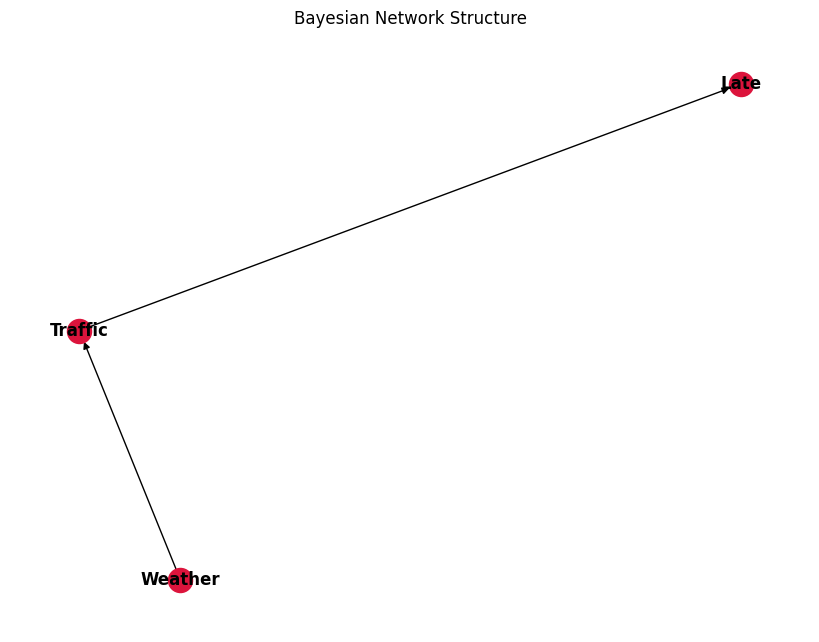

In [12]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
import matplotlib.pyplot as plt
import networkx as nx

model = BayesianModel([('Weather', 'Traffic'), ('Traffic', 'Late')])
model.fit(data, estimator=MaximumLikelihoodEstimator)

for cpd in model.get_cpds():
    print(cpd)

nx_graph = nx.DiGraph(model.edges())

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos, with_labels=True, node_color='crimson', font_weight='bold', arrows=True)
plt.title('Bayesian Network Structure')
plt.show()